## Project Proposal

In this tab, I will try to use PCA and t-SNE method to reduce the dimension for better analyzing the mobile phone dataset.

## Dimensionality introduction
In the field of machine learning, the dimensionality reduction refers to the use of some kind of projection method to project the data points in the original high-dimensional space to a lower dimensional space. By dimensionality reduction, we can reduce the error caused by redundant information and imporve the accuracy of recognition. 
Now, dimensionality has become part of data preparation process for future model training.
Following are some main methods of dimensionality reduction.

`Principle Component Analysis (PCA)`

Principle Component Analysis are commonly used linear dimensionality reduction method. One of ts goal is to use less data dimension that most can repensent the original dataset's characteristics by using some linear projection from high-dimension data into low-dimension data, in the mean while maximize the variance of the data being projected.
Here's a simple example expalining this concept. For example, if you want to organize some photos of people, and the two characteristics you really care about is the race and gender. When trying to reorganize the photos, your shoud find what matters to you most, and reorganize the photos by the order of characteristics you focus more on, and then creating the new display of those photos. So this is how PCA works. 
Following are some main process we doing PCA:

1. Standardization
2. Covariance Matrix Computation
3. Eigenvectors and Eigenvalues
4. Choosing Principal Components
5. Transforming Data

`t-SNE`

t-Distributed Stochastic Neighbor Embedding is a non-linear dimensionality reduction method that used to form high-dimensional data in a low-dimensional environment.
Our goal is to reduce the amount of complicated, multi-dimensional data regarding neighboring points (the "neighborhood") to a more manageable format, akin to what a distribution would use to express it. Method: Using these data points, we'll model a random walk. Moving toward a nearby site during this process is more likely than to occur at a distant one. Lastly, we locate points in a space that is smaller in dimension. The neighborhood pattern around these locations ought to be very similar to the initial high-dimensional neighborhood distribution. [1]

[1]: DSAN 5000 week-10 https://jfh.georgetown.domains/dsan5000/slides-and-labs/_site/content/slides/dimensionality-reduction/notes.html#t-distributed-stochastic-neighbor-embedding.



## Tools

In this part, the library will include json, numpy, pandas, matplotlib, scikit-learn, sklearn.manifold.TSNE, etc.


## Code


In [5]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
df=pd.read_csv("../../../data/01-modified-data/after_clean_mobile_phone_rating.csv")

In [8]:
x=df[['Launch Price','CAMERA','SELFIE','AUDIO','DISPLAY','BATTERY']]
y=df[['buying_intent']]
scaler = StandardScaler()
X = scaler.fit_transform(x)

### Dimensionality Reduction with PCA


In [9]:
# EIGEN VALUES/VECTOR
from numpy import linalg as LA
# w, v1 = LA.eig(cov)
w, v1 = LA.eig(np.cov(X.T))
print("\nCOV EIGENVALUES:",w)
print("COV EIGENVECTORS (across rows):")
print(v1.T)


COV EIGENVALUES: [2.46422101 1.21865397 0.24126397 0.958379   0.63183561 0.52512012]
COV EIGENVECTORS (across rows):
[[ 0.50024701  0.53945186  0.20733577  0.42438368  0.44295301 -0.19861426]
 [ 0.39766903  0.19014289 -0.67810966 -0.25218719 -0.31386294 -0.42867702]
 [-0.69792826  0.69118266 -0.15187461 -0.05535362  0.03015126 -0.09013136]
 [ 0.21875576  0.21730996 -0.34121012 -0.27020298  0.26679962  0.8026869 ]
 [-0.19511955 -0.26042618 -0.57511145  0.73310744  0.13997149  0.07946605]
 [ 0.13631836  0.2829461   0.16412113  0.3778623  -0.78332594  0.34357475]]


In [10]:
# PCA CALCULATION
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(X)
print('\nPCA')
print(pca.components_)


PCA
[[-0.50024701 -0.53945186 -0.20733577 -0.42438368 -0.44295301  0.19861426]
 [ 0.39766903  0.19014289 -0.67810966 -0.25218719 -0.31386294 -0.42867702]
 [ 0.21875576  0.21730996 -0.34121012 -0.27020298  0.26679962  0.8026869 ]
 [-0.19511955 -0.26042618 -0.57511145  0.73310744  0.13997149  0.07946605]
 [ 0.13631836  0.2829461   0.16412113  0.3778623  -0.78332594  0.34357475]
 [ 0.69792826 -0.69118266  0.15187461  0.05535362 -0.03015126  0.09013136]]


/var/folders/j3/s32rl54j1f76nvbcx9mxg4yc0000gn/T/ipykernel_92317/2939638508.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[:,0],X[:,1],X[:,2],marker=".", cmap="viridis")


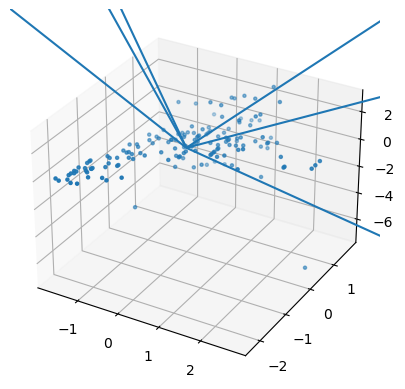

In [11]:
# # PLOT
v2=pca.components_
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2],marker=".", cmap="viridis")
v1=v1*1000
v2=v2*1000

ax.quiver(0,0,0,v1[0,0],v1[1,0],v1[2,0])
ax.quiver(0,0,0,v1[0,1],v1[1,1],v1[2,1])
ax.quiver(0,0,0,v1[0,2],v1[1,2],v1[2,2])

ax.quiver(0,0,0,v2[0,0],v2[1,0],v2[2,0])
ax.quiver(0,0,0,v2[0,1],v2[1,1],v2[2,1])
ax.quiver(0,0,0,v2[0,2],v2[1,2],v2[2,2])
plt.show()

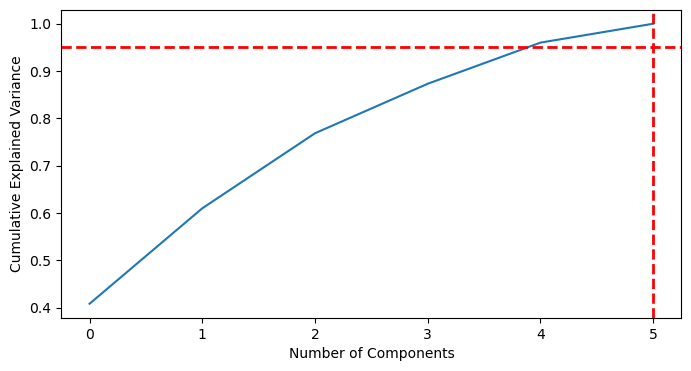

In [12]:
plt.figure(figsize=(8,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='red', linestyle='--', linewidth=2, label='95% explained variance')
cum_explained=np.cumsum(pca.explained_variance_ratio_)
optimal_components = np.where(cum_explained >= 0.95)[0][0]+1
plt.axvline(x=optimal_components, color='red', linestyle='--', linewidth=2, label=f'Optimal components: {optimal_components}')
plt.show()

### Obersvation
The curve represents the cumulative explained variance as a proportion of the total variance by the number of components. The y-axis is Cumulative explained variance, and the x-aixs is number of compemonts.

As shown, the cure is upward shift along with the increase of the number of components. The first component explains about more than 60% of the variance and the second component adds approximately 10% more to the explained variance, bringing the total to around 80%. However, the the added contribution decreased when the number of components increased.

We want to find out the number of components that make 95% cummulative explained variance. Thus I made a red line when cummulative exmplained variance=0.95, and as shown in the graph, the red line intersect the blue line at number of comonents around = 4. So, when the number of compnents is larger than 4, we can make 95% variance expliained.

This means the number of components that can make 95% cummulative explained variance is 5.

### Dimensionality Reduction with t-SNE


In [13]:
from sklearn.manifold import TSNE

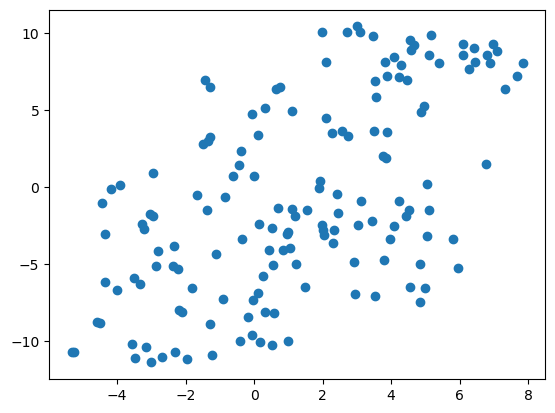

In [14]:
# 2D
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000)
X_tsne = tsne.fit_transform(X)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()

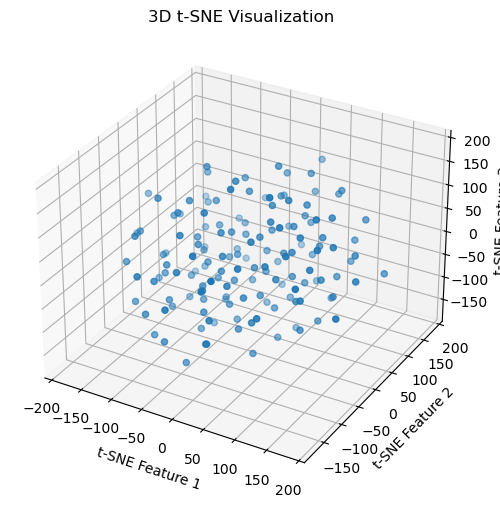

In [15]:
# 3D
tsne = TSNE(n_components=3, perplexity=30, learning_rate=200, n_iter=1000)
X_tsne = tsne.fit_transform(X)


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2])

ax.set_xlabel('t-SNE Feature 1')
ax.set_ylabel('t-SNE Feature 2')
ax.set_zlabel('t-SNE Feature 3')
plt.title('3D t-SNE Visualization')
plt.show()

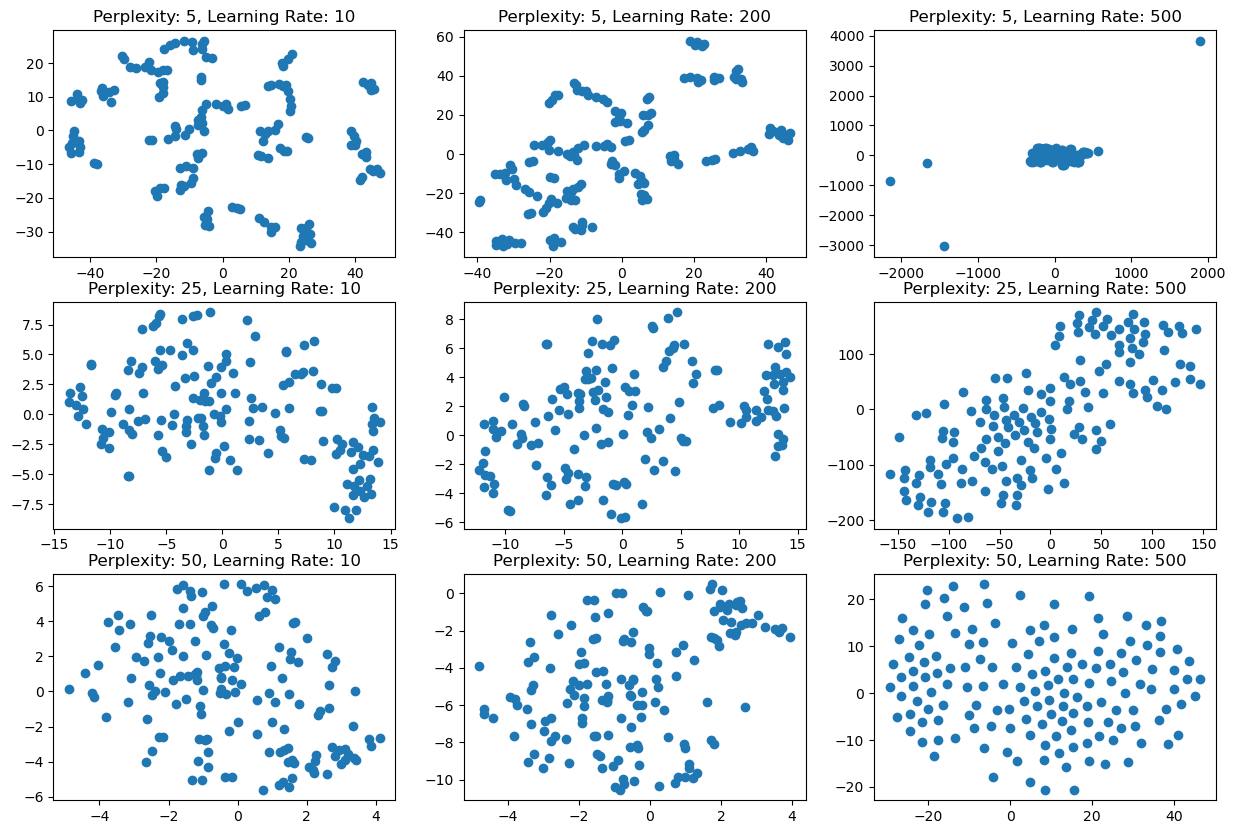

In [16]:
#parameter tuning for t-SNE (perplexity)
perplexities = [5, 25, 50]
learning_rates = [10, 200, 500]

fig, axs = plt.subplots(len(perplexities), len(learning_rates), figsize=(15, 10))

for i, perplexity in enumerate(perplexities):
    for j, learning_rate in enumerate(learning_rates):
        tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate, n_iter=1000)
        X_tsne = tsne.fit_transform(X)
        axs[i, j].scatter(X_tsne[:, 0], X_tsne[:, 1])
        axs[i, j].set_title(f'Perplexity: {perplexity}, Learning Rate: {learning_rate}')

plt.show()

### Observation
Perplexity: This t-SNE parameter influences how well the local and global components of your data are balanced.
Learning Rate: This variable also affects how well the algorithm matches the data. It can be represented as the size of the step that the algorithm uses to discover the representation.
As shown in the graph:
* Perplexity = 5 with learning rate increasing, the points become denser, which indicating a better balance between local and global perspective.
* Perplexity = 25 with learning rate increasing, the points become denser. When the learning rate=200, the structure is more obvious. However when learning rate reach 500, the points are too dense, which may refelct the learning rate may be too high.
* Perplexity = 50 with learning rate increasing, the points become denser as well, but not show the structure clearly, so it may not a good fit.
  
From the observation above, I believe the perplexity=25-50 and learning rate=20 might be the best balance for visualizing the data structure.

However, Compared to PCA, I think t-SNE is less practical to this dataset than PCA because the structure of pattern of t-SNE for this dataset is not so easy to recognize.

## Project Report - Evaluation and comparasion

### PCA 
Strength: 

1. PCA can be both used in the small, simple constructed dataset and large complicated dataset.
   
2. It reduce the noise in the dataset
   
3. preserve the global structure
   
4. works well with linear dimensionality reduction
   
Weakness:

1. does not involve hyperparameter tuning
   
2. Oversimplification of the data
   
3. loss of valuable information

### t-SNE
Strength:

1. involve hyperparameters tuning
   
2. Preserves Local and Global Structure
   
Weakness:

1. When we are trying to reducing the dimension, the  distance between points in low dimension are actually not match with the actual distance of the high dimension
   
2. In the high dimension, if the distance between points are large, but when we convert to low dimension, the distance may be smaller.
   
3. It is computationally intensive and may not scale well to extremely large datasets [1]

### Conclusion

If the dataset is more linear and dataset size is small, using PCA would be better. 

If the dataset is not linear and the dataset size is large, using t-SNE would be better.

I think PCA is better to use in this dataset because from the plot of t-SNE, it's really hard to recognize the pattern, but from the result of PCA, we can easity find out how many components we want to keep. So, this dataset may be more in linear relationship. Also, my dataset is not large, so it's better to use PCA over t-SNE.

In conclusion, when we doing the dimensionality recution process, it's important to choose which method we'd like to use to avoid valuable information missing.
